# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [1]:
from IPython.display import clear_output

In [3]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [4]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [6]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2022-04-30'
end_date = '2025-04-30'   #'2025-04-30'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'TSLA', 'AVGO', 'GOOG', 'BRK-B',
          'JPM', 'LLY', 'V', 'XOM', 'UNH', 'MA', 'COST', 'WMT', 'HD', 'PG',
          'NFLX', 'JNJ', 'ABBV', 'CRM', 'BAC', 'ORCL', 'MRK', 'CVX', 'WFC', 'KO',
          'CSCO', 'ACN', 'NOW', 'TMO', 'MCD', 'IBM', 'AMD', 'DIS', 'PEP', 'LIN',
          'ABT', 'ISRG', 'PM', 'GE', 'ADBE', 'GS', 'QCOM', 'TXN', 'CAT', 'INTU']

# Get the data
data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
data

[*********************100%***********************]  50 of 50 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2020-04-30   71.205704   66.976059   84.281425  171.929520  353.640015   
2020-05-01   70.059372   67.497528   82.231361  167.194656  343.839996   
2020-05-04   71.050621   66.699036   82.213058  166.674774  349.109985   
2020-05-05   72.117004   69.558960   85.141747  168.615097  356.130005   
2020-05-06   72.861053   69.599701   83.357056  167.463928  362.519989   
...                ...         ...         ...         ...         ...   
2025-04-23  204.332062  177.050003  129.839996  288.160004  351.959991   
2025-04-24  208.097107  180.369995  129.380005  291.410004  360.910004   
2025-04-25  209.005920  186.059998  128.850006  293.390015  367.720001   
2025-04-28  209.864792  192.339996  129.529999  293.250000  368.619995   
2025-04-29  210.933395  193.509995  130.500000  298.470001  370.980011   

Price                                                                 ...  \
Ticker            AMD        AMZN        AVGO        BAC       BRK-B  ...   
Date                                                                  ...   
2020-04-30  52.389999  123.699997   23.907366  21.239513  187.360001  ...   
2020-05-01  49.880001  114.302002   22.858192  20.382868  182.669998  ...   
2020-05-04  52.560001  115.799500   23.083521  20.250399  177.949997  ...   
2020-05-05  52.189999  115.889999   23.313248  20.011950  176.029999  ...   
2020-05-06  52.160000  117.563004   23.252512  19.738173  172.380005  ...   
...               ...         ...         ...        ...         ...  ...   
2025-04-23  90.389999  180.600006  176.910004  38.750000  526.809998  ...   
2025-04-24  94.470001  186.539993  188.149994  39.580002  531.640015  ...   
2025-04-25  96.650002  188.990005  192.309998  39.689999  530.960022  ...   
2025-04-28  96.389999  187.699997  192.470001  39.779999  530.940002  ...   
2025-04-29  96.059998  187.389999  191.169998  39.990002  534.570007  ...   

Price        Volume                                                   \
Ticker           PM      QCOM      TMO       TSLA       TXN      UNH   
Date                                                                   
2020-04-30  9192200  17113500  2215000  427078500   5781000  7631700   
2020-05-01  4782300   9742100  1603100  487977000   5839800  3526100   
2020-05-04  4589800   7202400  1189000  288556500   4987000  2894200   
2020-05-05  3696400   7540800  1139900  254875500   5242400  2501300   
2020-05-06  7199100   8179700  1215600  166848000   3701300  2579200   
...             ...       ...      ...        ...       ...      ...   
2025-04-23  9084500   9073500  3492200  150381900  14125000  8345700   
2025-04-24  8564900   8810600  3662400   94464200  18950400  7629100   
2025-04-25  7755700   5145600  2698300  167560700   8383300  9263800   
2025-04-28  6153300   5743500  2531600  151731800   5170500  6614300   
2025-04-29  5346500   6692000  2437300  108906600   6566500  9909100   

Price                                               
Ticker             V       WFC       WMT       XOM  
Date                                                
2020-04-30  11331600  29506100  40497900  37076300  
2020-05-01  10109600  35197600  31143900  35399300  
2020-05-04   9386200  34343900  17807700  27465600  
2020-05-05  13513000  56753400  19337400  29276200  
2020-05-06   8540500  57732900  17309100  22659000  
...              ...       ...       ...       ...  
2025-04-23   8906000  20678800  18046900  14235700  
2025-04-24   8055200  18420900  13444500   9849600  
2025-04-25   4452800  17775900  15317200  11245800  
2025-04-28   5422900  16694100  12950000  13890900  
2025-04-29   5519500  24563600  12679000   9483100  

[1256 rows x 300 columns]

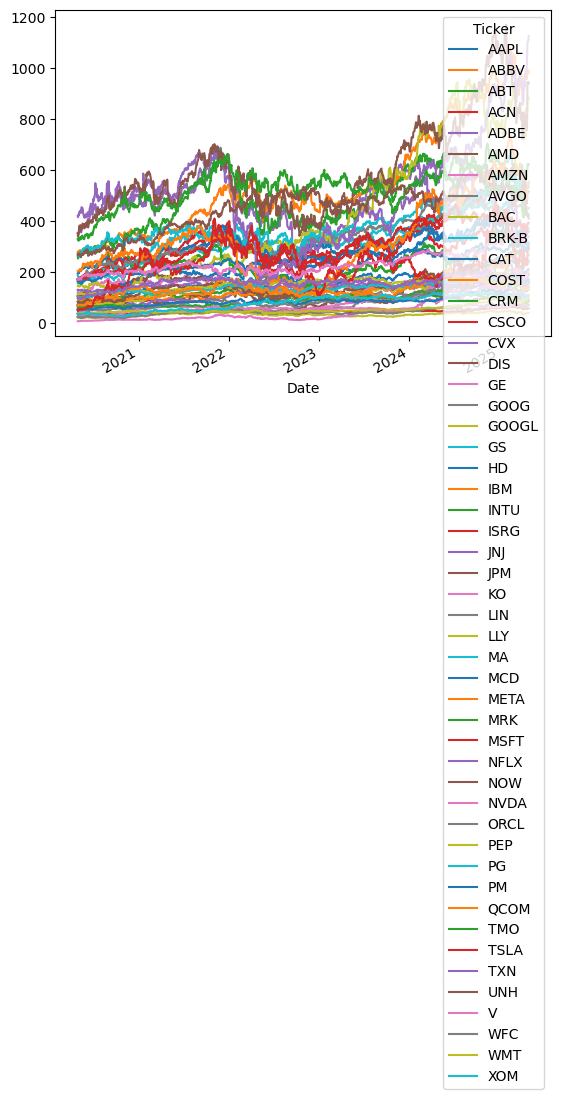

In [7]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [8]:
# Closing price
data = data['Adj Close']
data

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,71.205704,66.976059,84.281425,171.929520,353.640015,52.389999,123.699997,23.907366,21.239513,187.360001,...,57.413315,70.595291,330.662079,52.125332,100.123306,271.762909,172.191315,25.436089,37.561844,36.323387
2020-05-01,70.059372,67.497528,82.231361,167.194656,343.839996,49.880001,114.302002,22.858192,20.382868,182.669998,...,56.397427,67.876312,325.850586,46.754665,95.376663,264.366547,169.156387,24.157713,37.985191,33.720474
2020-05-04,71.050621,66.699036,82.213058,166.674774,349.109985,52.560001,115.799500,23.083521,20.250399,177.949997,...,56.420513,67.912170,322.797638,50.745998,96.063438,267.181915,169.715149,23.947578,38.226234,35.080559
2020-05-05,72.117004,69.558960,85.141747,168.615097,356.130005,52.189999,115.889999,23.313248,20.011950,176.029999,...,55.566246,69.662033,332.282471,51.214001,96.967583,272.292542,171.921539,23.045712,38.544537,35.041470
2020-05-06,72.861053,69.599701,83.357056,167.463928,362.519989,52.160000,117.563004,23.252512,19.738173,172.380005,...,55.027519,70.774765,331.126495,52.172001,97.732605,268.324860,172.249130,22.424040,38.102627,34.384880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,204.332062,177.050003,129.839996,288.160004,351.959991,90.389999,180.600006,176.910004,38.750000,526.809998,...,168.110001,140.460007,431.640015,250.740005,150.862915,427.959991,333.815613,67.569305,94.730957,106.390129
2025-04-24,208.097107,180.369995,129.380005,291.410004,360.910004,94.470001,186.539993,188.149994,39.580002,531.640015,...,170.070007,147.210007,426.660004,259.510010,160.758499,424.250000,335.153381,69.180458,95.608833,107.638626
2025-04-25,209.005920,186.059998,128.850006,293.390015,367.720001,96.650002,188.990005,192.309998,39.689999,530.960022,...,170.240005,148.559998,424.239990,284.950012,161.482330,418.640015,334.614288,69.349541,94.860641,107.579178


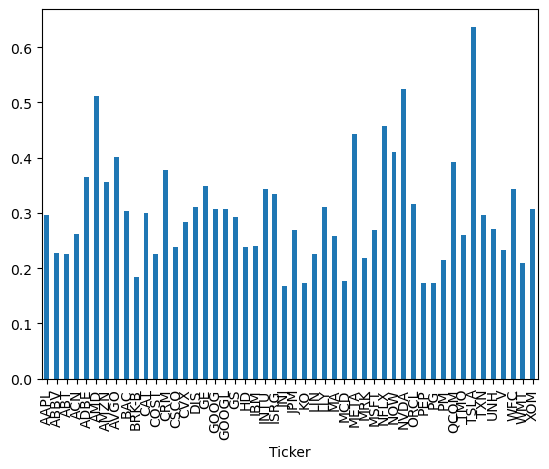

In [9]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()  # Explicitly render the plot

## Process on all dataset


In [17]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000352,0.000046,0.000087,0.000159,0.000237,0.000331,0.000251,2.410917e-04,0.000109,0.000092,...,0.000050,0.000272,0.000132,0.000383,0.000201,0.000063,0.000136,0.000106,0.000077,0.000069
ABBV,0.000046,0.000207,0.000071,0.000053,0.000045,0.000030,0.000032,4.084526e-05,0.000058,0.000054,...,0.000061,0.000044,0.000065,0.000027,0.000057,0.000064,0.000060,0.000064,0.000041,0.000065
ABT,0.000087,0.000071,0.000205,0.000101,0.000111,0.000110,0.000091,7.565255e-05,0.000067,0.000063,...,0.000056,0.000103,0.000131,0.000096,0.000087,0.000061,0.000087,0.000061,0.000042,0.000030
ACN,0.000159,0.000053,0.000101,0.000273,0.000198,0.000226,0.000180,1.793058e-04,0.000126,0.000099,...,0.000054,0.000187,0.000129,0.000212,0.000161,0.000077,0.000134,0.000132,0.000060,0.000077
ADBE,0.000237,0.000045,0.000111,0.000198,0.000532,0.000383,0.000301,2.810384e-04,0.000085,0.000075,...,0.000035,0.000283,0.000162,0.000365,0.000205,0.000059,0.000154,0.000087,0.000065,0.000035
AMD,0.000331,0.000030,0.000110,0.000226,0.000383,0.001050,0.000402,4.787945e-04,0.000161,0.000105,...,0.000026,0.000503,0.000205,0.000600,0.000362,0.000071,0.000183,0.000166,0.000075,0.000076
AMZN,0.000251,0.000032,0.000091,0.000180,0.000301,0.000402,0.000506,2.895883e-04,0.000123,0.000086,...,0.000025,0.000291,0.000148,0.000421,0.000209,0.000048,0.000140,0.000122,0.000081,0.000046
AVGO,0.000241,0.000041,0.000076,0.000179,0.000281,0.000479,0.000290,6.449750e-04,0.000140,0.000087,...,0.000030,0.000410,0.000144,0.000455,0.000290,0.000055,0.000142,0.000153,0.000063,0.000076
BAC,0.000109,0.000058,0.000067,0.000126,0.000085,0.000161,0.000123,1.402181e-04,0.000370,0.000151,...,0.000089,0.000166,0.000074,0.000208,0.000150,0.000076,0.000133,0.000351,0.000050,0.000190


In [19]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


Ticker
AAPL     0.144785
ABBV     0.171995
ABT      0.066874
ACN      0.093992
ADBE     0.015946
AMD      0.181952
AMZN     0.126898
AVGO     0.481199
BAC      0.112059
BRK-B    0.185496
CAT      0.141239
COST     0.259500
CRM      0.145628
CSCO     0.103519
CVX      0.179200
DIS     -0.095671
GE       0.359469
GOOG     0.212281
GOOGL    0.210481
GS       0.208027
HD       0.116342
IBM      0.196065
INTU     0.187091
ISRG     0.172221
JNJ      0.025385
JPM      0.186453
KO       0.086978
LIN      0.135632
LLY      0.418809
MA       0.097768
MCD      0.105221
META     0.427742
MRK      0.063629
MSFT     0.178487
NFLX     0.269656
NOW      0.197391
NVDA     0.933348
ORCL     0.216350
PEP      0.011112
PG       0.059705
PM       0.216570
QCOM     0.046366
TMO      0.006853
TSLA     0.242565
TXN      0.027185
UNH      0.063537
V        0.106301
WFC      0.240724
WMT      0.189941
XOM      0.303240
dtype: float64

In [21]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL     0.296558
ABBV     0.227219
ABT      0.226598
ACN      0.261306
ADBE     0.364814
AMD      0.512243
AMZN     0.355506
AVGO     0.401552
BAC      0.303960
BRK-B    0.183600
CAT      0.300475
COST     0.225674
CRM      0.377364
CSCO     0.238365
CVX      0.283749
DIS      0.310526
GE       0.349237
GOOG     0.306756
GOOGL    0.307538
GS       0.291889
HD       0.238120
IBM      0.241103
INTU     0.343772
ISRG     0.333831
JNJ      0.167064
JPM      0.270027
KO       0.172553
LIN      0.225079
LLY      0.310419
MA       0.258774
MCD      0.176318
META     0.442769
MRK      0.218478
MSFT     0.268719
NFLX     0.458095
NOW      0.411206
NVDA     0.525115
ORCL     0.316686
PEP      0.173317
PG       0.173409
PM       0.214101
QCOM     0.391800
TMO      0.259639
TSLA     0.637065
TXN      0.295914
UNH      0.270264
V        0.233027
WFC      0.343966
WMT      0.210101
XOM      0.306719
dtype: float64

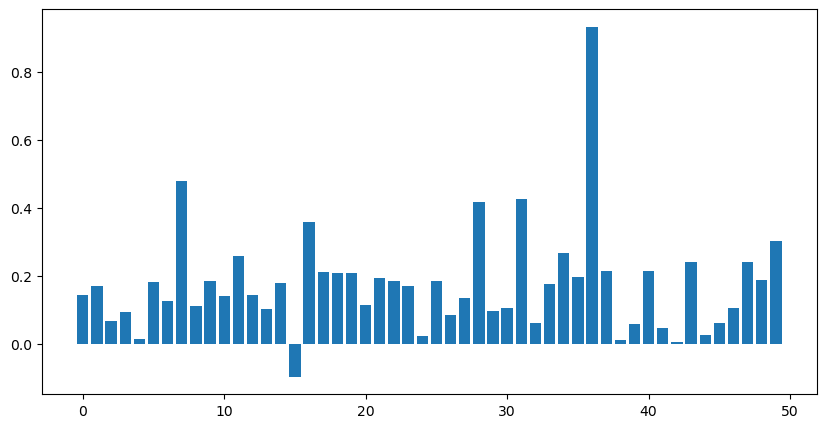

DONE


In [23]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [26]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [28]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        # ff1 = exp_return*0.1 - exp_risk*0.1
        # ff2 = exp_return*exp_return*0.1 - exp_risk*0.1
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        # diversity (using entropy to measure)
        # diversity = -np.sum(x * np.log(x + 1e-10))

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [30]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [32]:
'''

# for crossover 
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.pntx import PointCrossover, SinglePointCrossover, TwoPointCrossover
from pymoo.operators.crossover.expx import ExponentialCrossover
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.hux import HalfUniformCrossover

# for selection
# it seems that we can't set selection here
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.operators.sampling.lhs import LHS

# Adding configure 
configurations = [
    # BinaryRandomSampling
    {
        'name': 'BinaryRandomSampling_SBX',
        'sampling': BinaryRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'BinaryRandomSampling_SinglePtXO',
         'sampling': BinaryRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'BinaryRandomSampling_TwoPtXO',
        'sampling': BinaryRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    
    {
        'name': 'BinaryRandomSampling_UnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'BinaryRandomSampling_HalfUnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },

    # FloatRandomSampling
    {
        'name': 'FloatRandomSampling_SBX',
        'sampling': FloatRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'FloatRandomSampling_SinglePtXO',
         'sampling': FloatRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'FloatRandomSampling_TwoPtXO',
        'sampling': FloatRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'FloatRandomSampling_ExpXO',
        'sampling': FloatRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'FloatRandomSampling_UnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'FloatRandomSampling_HalfUnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },
    
    # LHS
    {
        'name': 'LHS_SBX',
        'sampling': LHS(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'LHS_SinglePtXO',
         'sampling': LHS(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'LHS_TwoPtXO',
        'sampling': LHS(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'LHS_ExpXO',
        'sampling': LHS(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'LHS_UnifXO',
        'sampling': LHS(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'LHS_HalfUnifXO',
        'sampling': LHS(),
        'crossover': HalfUniformCrossover(),
    },
]
'''

''' we ignore
{
        'name': 'BinaryRandomSamplingn_ExpXO',
        'sampling': BinaryRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
'''

'''
# Store results 
results = {}

'''

'\n# Store results \nresults = {}\n\n'

## Needed function 

In [49]:
from pymoo.indicators.hv import HV

def calculate_expected_returns(current_data):
    ind_er = current_data.resample('Y').last().pct_change().mean()
    # print(ind_er)
    return ind_er

def calculate_covariance_matrix(current_data):
    cov_matrix = current_data.pct_change().apply(lambda x: np.log(1+x)).cov()
    # print(cov_matrix)
    return cov_matrix
    
def execute_trades(stock_alloc, final_weight, current_budget, price_day, budget_history, stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    # print(f'Prices: {prices_array}')

    # print(f'Stock allocation: {stock_alloc}')

    
    if not np.allclose(stock_alloc, np.zeros(len(ticker))):
        current_budget = stock_alloc @ prices_array
    
    
    
    dollar_alloc = current_budget*final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    # print(f'Stock allocation (shares): {stock_alloc}')

    budget_history.append(current_budget)
    stock_alloc_history.append(stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {current_budget}')

def calculate_HV(F):
    ref_point = np.array([0.35, 0.35])

    ind = HV(ref_point=ref_point)
    print("HV", ind(F))
    return ind(F)
    

In [51]:
'''
%%time
for config in configurations:
    print(f"\nRunning configuration: {config['name']}")
'''

results = {}
portfolio_history = []
data_size = len(data)
current_budget = 1_000_000
stock_alloc = np.zeros(len(ticker))  
budget_history = []
stock_alloc_history = []
test_period = 250

for day in range(test_period):
    print(f"Current day is: {day}")
    serach_day = data_size - (test_period-day)
    current_data = data.iloc[:serach_day] 

    # print(current_data)
    mu = calculate_expected_returns(current_data)
    cov = calculate_covariance_matrix(current_data)
    # print(f"current_data size is {len(current_data)}")
    problem = PortfolioProblem(mu, cov)
    # print(current_data)
    
    '''
    algorithm = NSGA2(repair=PortfolioRepair(),
                      sampling = config['sampling'],
                      crossover=config['crossover'])
    '''
    
    algorithm = NSGA2(repair=PortfolioRepair())
    

    res = minimize(problem,
                   algorithm,
                   seed=1,
                   verbose=False)

    # adding the result
    # results[config['name']] = res

    # Get optimal portfolio weights
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]  # Adjust for minimization/maximization
    
    # Select portfolio with maximum Sharpe ratio
    max_sharpe_idx = sharpe.argmax()
    optimal_weights = X[max_sharpe_idx]

    # calculate HV
    HVindex = calculate_HV(F)

    '''
    # Add other indicators (f1, ..., fk) for daily allocation
    additional_indicators = calculate_technical_indicators(current_data)  # Assume this function exists
    final_weights = adjust_weights_with_indicators(optimal_weights, additional_indicators)
    '''


    
    # Make investment with adjusted weights
    daily_return = execute_trades(stock_alloc, optimal_weights, current_budget, serach_day, budget_history, stock_alloc_history)  # Assume this function exists
    portfolio_history.append(daily_return)
    

Current day is: 0


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05754802135698416
trade data is 2024-04-30 00:00:00
current budget is 1000000
Current day is: 1


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()
C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05871875231075715
trade data is 2024-05-01 00:00:00
current budget is 979368.4791363459
Current day is: 2
HV 0.056487974190732135
trade data is 2024-05-02 00:00:00
current budget is 980965.8412115065
Current day is: 3


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05725390566084367
trade data is 2024-05-03 00:00:00
current budget is 980987.7238346885
Current day is: 4


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05625831244322713
trade data is 2024-05-06 00:00:00
current budget is 1006400.7761636211
Current day is: 5


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05684448602484821
trade data is 2024-05-07 00:00:00
current budget is 1004590.7607068237
Current day is: 6


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05830508890795434
trade data is 2024-05-08 00:00:00
current budget is 1002508.2416569602
Current day is: 7


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.058186362799112906
trade data is 2024-05-09 00:00:00
current budget is 1000810.4239499046
Current day is: 8


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05678540166200757
trade data is 2024-05-10 00:00:00
current budget is 997610.6528323079
Current day is: 9


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.056028197623286806
trade data is 2024-05-13 00:00:00
current budget is 997341.8735975837
Current day is: 10


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05661958553231497
trade data is 2024-05-14 00:00:00
current budget is 1005542.5053275102
Current day is: 11


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05771559504277165
trade data is 2024-05-15 00:00:00
current budget is 1031409.8706670522
Current day is: 12


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.055153309021230834
trade data is 2024-05-16 00:00:00
current budget is 1021185.381322206
Current day is: 13


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.056266613329640114
trade data is 2024-05-17 00:00:00
current budget is 1018579.3989838334
Current day is: 14


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.056606783313452
trade data is 2024-05-20 00:00:00
current budget is 1030532.106385723
Current day is: 15


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05515324839021578
trade data is 2024-05-21 00:00:00
current budget is 1038592.8589006398
Current day is: 16


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.056000898928291375
trade data is 2024-05-22 00:00:00
current budget is 1032031.5564595269
Current day is: 17


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05383607072690459
trade data is 2024-05-23 00:00:00
current budget is 1062741.6695336963
Current day is: 18


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05693981331965489
trade data is 2024-05-24 00:00:00
current budget is 1070852.9393802988
Current day is: 19


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05424398293817585
trade data is 2024-05-28 00:00:00
current budget is 1100667.8631885604
Current day is: 20


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05633096866244734
trade data is 2024-05-29 00:00:00
current budget is 1102252.055393821
Current day is: 21


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05817588298956877
trade data is 2024-05-30 00:00:00
current budget is 1089452.811320688
Current day is: 22


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.058993881189419305
trade data is 2024-05-31 00:00:00
current budget is 1097114.0044993563
Current day is: 23


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05704990237749062
trade data is 2024-06-03 00:00:00
current budget is 1112876.5078184528
Current day is: 24


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05436442730737922
trade data is 2024-06-04 00:00:00
current budget is 1114511.8488441808
Current day is: 25


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05485231578965005
trade data is 2024-06-05 00:00:00
current budget is 1135956.0947249213
Current day is: 26


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05193693986608603
trade data is 2024-06-06 00:00:00
current budget is 1135556.5186948888
Current day is: 27


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.055635169496263764
trade data is 2024-06-07 00:00:00
current budget is 1138026.5642809747
Current day is: 28


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05578111471546163
trade data is 2024-06-10 00:00:00
current budget is 1149110.0790239782
Current day is: 29


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05457483786190603
trade data is 2024-06-11 00:00:00
current budget is 1144061.9453698453
Current day is: 30


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05483961394964796
trade data is 2024-06-12 00:00:00
current budget is 1154066.7991342517
Current day is: 31


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05406334740113314
trade data is 2024-06-13 00:00:00
current budget is 1174749.8305068724
Current day is: 32


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05687258456225866
trade data is 2024-06-14 00:00:00
current budget is 1176905.130044899
Current day is: 33


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05674854101569335
trade data is 2024-06-17 00:00:00
current budget is 1175701.2583421709
Current day is: 34


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05543717908750771
trade data is 2024-06-18 00:00:00
current budget is 1196431.9513375591
Current day is: 35


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05520764869658326
trade data is 2024-06-20 00:00:00
current budget is 1184205.5014976964
Current day is: 36


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05507371955174255
trade data is 2024-06-21 00:00:00
current budget is 1165620.2766162723
Current day is: 37


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05533825608010178
trade data is 2024-06-24 00:00:00
current budget is 1149510.6572668296
Current day is: 38


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.056073087186351976
trade data is 2024-06-25 00:00:00
current budget is 1184251.4975377196
Current day is: 39


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05410899266778811
trade data is 2024-06-26 00:00:00
current budget is 1183627.1243380336
Current day is: 40


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05367894953436034
trade data is 2024-06-27 00:00:00
current budget is 1181784.822000896
Current day is: 41


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.054179110582886075
trade data is 2024-06-28 00:00:00
current budget is 1178373.7922023651
Current day is: 42


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.055513865435690674
trade data is 2024-07-01 00:00:00
current budget is 1187681.5809947085
Current day is: 43


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05347860239241561
trade data is 2024-07-02 00:00:00
current budget is 1176465.9868924168
Current day is: 44


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05626722916638486
trade data is 2024-07-03 00:00:00
current budget is 1191669.8837188785
Current day is: 45


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.055594011821690756
trade data is 2024-07-05 00:00:00
current budget is 1188906.0694682961
Current day is: 46


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05445107223383949
trade data is 2024-07-08 00:00:00
current budget is 1194409.5290012823
Current day is: 47


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05588249548817634
trade data is 2024-07-09 00:00:00
current budget is 1210043.7817460725
Current day is: 48


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05405201842815606
trade data is 2024-07-10 00:00:00
current budget is 1228014.8976747736
Current day is: 49


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05523813516179547
trade data is 2024-07-11 00:00:00
current budget is 1200570.3799570582
Current day is: 50


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.055679965119347745
trade data is 2024-07-12 00:00:00
current budget is 1214005.6876187075
Current day is: 51


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.054385065870292244
trade data is 2024-07-15 00:00:00
current budget is 1216979.25823177
Current day is: 52


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05327760060747851
trade data is 2024-07-16 00:00:00
current budget is 1207740.181780729
Current day is: 53


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.053867974308627074
trade data is 2024-07-17 00:00:00
current budget is 1165996.0810290715
Current day is: 54


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05133271587644136
trade data is 2024-07-18 00:00:00
current budget is 1153148.9745292137
Current day is: 55


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05095276334750781
trade data is 2024-07-19 00:00:00
current budget is 1140408.8908009895
Current day is: 56


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.051862371087120766
trade data is 2024-07-22 00:00:00
current budget is 1162557.198312756
Current day is: 57


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05174286367883943
trade data is 2024-07-23 00:00:00
current budget is 1160143.439615622
Current day is: 58


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.052048449450767816
trade data is 2024-07-24 00:00:00
current budget is 1129017.2346302154
Current day is: 59


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05188534523371536
trade data is 2024-07-25 00:00:00
current budget is 1107990.3693392542
Current day is: 60


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.053580630878809495
trade data is 2024-07-26 00:00:00
current budget is 1102246.1334314414
Current day is: 61


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.051743210911064666
trade data is 2024-07-29 00:00:00
current budget is 1095866.5340329036
Current day is: 62


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04905271738144809
trade data is 2024-07-30 00:00:00
current budget is 1059190.5168161765
Current day is: 63


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05282374084328873
trade data is 2024-07-31 00:00:00
current budget is 1110802.354161181
Current day is: 64


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05289626756767503
trade data is 2024-08-01 00:00:00
current budget is 1092585.5281295641
Current day is: 65


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05207440270812074
trade data is 2024-08-02 00:00:00
current budget is 1072843.9413293519
Current day is: 66


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05195244503297414
trade data is 2024-08-05 00:00:00
current budget is 1030063.6140541486
Current day is: 67


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.051996015668778914
trade data is 2024-08-06 00:00:00
current budget is 1050625.560942607
Current day is: 68


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05433853405395992
trade data is 2024-08-07 00:00:00
current budget is 1028671.2565396202
Current day is: 69


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05196649860771979
trade data is 2024-08-08 00:00:00
current budget is 1090776.1691337596
Current day is: 70


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05321665228237067
trade data is 2024-08-09 00:00:00
current budget is 1115380.8255705952
Current day is: 71


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.0519430041974763
trade data is 2024-08-12 00:00:00
current budget is 1126589.8748298083
Current day is: 72


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05182269410149415
trade data is 2024-08-13 00:00:00
current budget is 1160620.9690880303
Current day is: 73


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05230042208493154
trade data is 2024-08-14 00:00:00
current budget is 1180669.1676113384
Current day is: 74


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.050257893763280846
trade data is 2024-08-15 00:00:00
current budget is 1199356.14928099
Current day is: 75


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.051696605974481516
trade data is 2024-08-16 00:00:00
current budget is 1198359.549151489
Current day is: 76


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05060262847691745
trade data is 2024-08-19 00:00:00
current budget is 1216796.0579158985
Current day is: 77


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.05017717119605953
trade data is 2024-08-20 00:00:00
current budget is 1212802.101997496
Current day is: 78


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.049916797430325635
trade data is 2024-08-21 00:00:00
current budget is 1215472.132637473
Current day is: 79


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04674296030210948
trade data is 2024-08-22 00:00:00
current budget is 1202805.9834991186
Current day is: 80


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.049547536798148044
trade data is 2024-08-23 00:00:00
current budget is 1224865.7455481007
Current day is: 81


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04740166417865132
trade data is 2024-08-26 00:00:00
current budget is 1222288.1985656607
Current day is: 82


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.047741783753424916
trade data is 2024-08-27 00:00:00
current budget is 1227993.4248518317
Current day is: 83


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04900114744861991
trade data is 2024-08-28 00:00:00
current budget is 1213824.7354886583
Current day is: 84


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04847964666714035
trade data is 2024-08-29 00:00:00
current budget is 1186127.3511189884
Current day is: 85


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04670049438446941
trade data is 2024-08-30 00:00:00
current budget is 1200389.5819558396
Current day is: 86


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04791380378334048
trade data is 2024-09-03 00:00:00
current budget is 1156273.2165268487
Current day is: 87


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04783999800576719
trade data is 2024-09-04 00:00:00
current budget is 1142083.2952183168
Current day is: 88


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04878403797653085
trade data is 2024-09-05 00:00:00
current budget is 1126808.9766879766
Current day is: 89


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.047975472603265346
trade data is 2024-09-06 00:00:00
current budget is 1105831.8870004485
Current day is: 90


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04762286935084722
trade data is 2024-09-09 00:00:00
current budget is 1128123.053040399
Current day is: 91


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04794539156065127
trade data is 2024-09-10 00:00:00
current budget is 1119508.5729757706
Current day is: 92


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.0489060487458487
trade data is 2024-09-11 00:00:00
current budget is 1148049.9788912467
Current day is: 93


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04703175017663212
trade data is 2024-09-12 00:00:00
current budget is 1163975.3964664068
Current day is: 94


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04887069990778398
trade data is 2024-09-13 00:00:00
current budget is 1159714.393988349
Current day is: 95


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04446138036333021
trade data is 2024-09-16 00:00:00
current budget is 1156512.6594605087
Current day is: 96


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04512516104396697
trade data is 2024-09-17 00:00:00
current budget is 1147349.991938849
Current day is: 97


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.0469671698004689
trade data is 2024-09-18 00:00:00
current budget is 1141798.9777624395
Current day is: 98


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.048616032650832273
trade data is 2024-09-19 00:00:00
current budget is 1163578.493217424
Current day is: 99


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04796088629820577
trade data is 2024-09-20 00:00:00
current budget is 1158479.5244862165
Current day is: 100


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04670972134124837
trade data is 2024-09-23 00:00:00
current budget is 1163519.8278448181
Current day is: 101


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04598814947504396
trade data is 2024-09-24 00:00:00
current budget is 1179683.5391230774
Current day is: 102


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.045239559767878613
trade data is 2024-09-25 00:00:00
current budget is 1180832.3155338378
Current day is: 103


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04653743768177913
trade data is 2024-09-26 00:00:00
current budget is 1169664.4405841904
Current day is: 104


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04827573747171931
trade data is 2024-09-27 00:00:00
current budget is 1154678.8263701836
Current day is: 105


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04990510900963782
trade data is 2024-09-30 00:00:00
current budget is 1162826.1559837572
Current day is: 106


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.0475959057317367
trade data is 2024-10-01 00:00:00
current budget is 1154560.8679888106
Current day is: 107


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04582423655340118
trade data is 2024-10-02 00:00:00
current budget is 1164191.4903285552
Current day is: 108


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()
C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04569854321274637
trade data is 2024-10-03 00:00:00
current budget is 1173897.4059518725
Current day is: 109
HV 0.04739283022039578
trade data is 2024-10-04 00:00:00
current budget is 1187395.0987525159
Current day is: 110


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04622000459034128
trade data is 2024-10-07 00:00:00
current budget is 1203824.4035127214
Current day is: 111


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.0474350661180352
trade data is 2024-10-08 00:00:00
current budget is 1216483.3036010684
Current day is: 112


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04627702265131837
trade data is 2024-10-09 00:00:00
current budget is 1219490.9127541196
Current day is: 113


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04625718831798687
trade data is 2024-10-10 00:00:00
current budget is 1222988.7778328587
Current day is: 114


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.048135848803233995
trade data is 2024-10-11 00:00:00
current budget is 1234845.7205936646
Current day is: 115


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04800046252494969
trade data is 2024-10-14 00:00:00
current budget is 1246197.2957492168
Current day is: 116


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04507396224781267
trade data is 2024-10-15 00:00:00
current budget is 1210296.352590716
Current day is: 117


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.048642038228484445
trade data is 2024-10-16 00:00:00
current budget is 1224732.6453589816
Current day is: 118


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04717983485595615
trade data is 2024-10-17 00:00:00
current budget is 1228227.9255664397
Current day is: 119


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04447250601108969
trade data is 2024-10-18 00:00:00
current budget is 1231041.10765073
Current day is: 120


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04410109341041381
trade data is 2024-10-21 00:00:00
current budget is 1242687.9190542449
Current day is: 121


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04615188208130559
trade data is 2024-10-22 00:00:00
current budget is 1242437.8588529744
Current day is: 122


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04458922852063704
trade data is 2024-10-23 00:00:00
current budget is 1226909.0485293542
Current day is: 123


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.046439356491735105
trade data is 2024-10-24 00:00:00
current budget is 1223945.996137693
Current day is: 124


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.047751287782329316
trade data is 2024-10-25 00:00:00
current budget is 1224584.8732248875
Current day is: 125


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.04555683970267037
trade data is 2024-10-28 00:00:00
current budget is 1222165.951594044
Current day is: 126


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


KeyboardInterrupt: 

#### for i in range(len(stock_alloc_history)):
    print(stock_alloc_history[i]) 

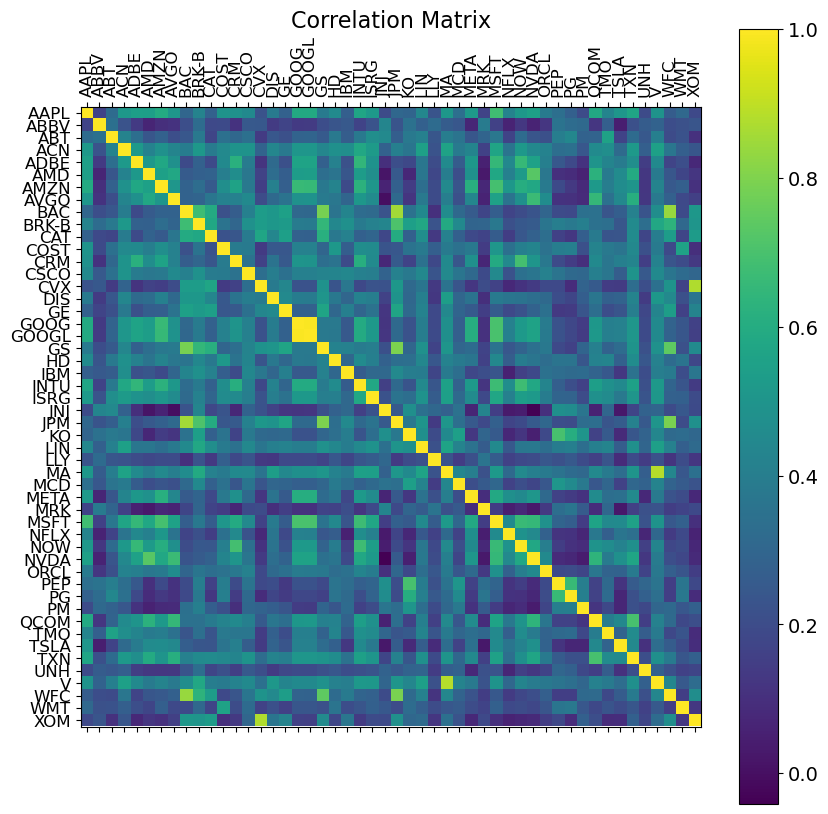

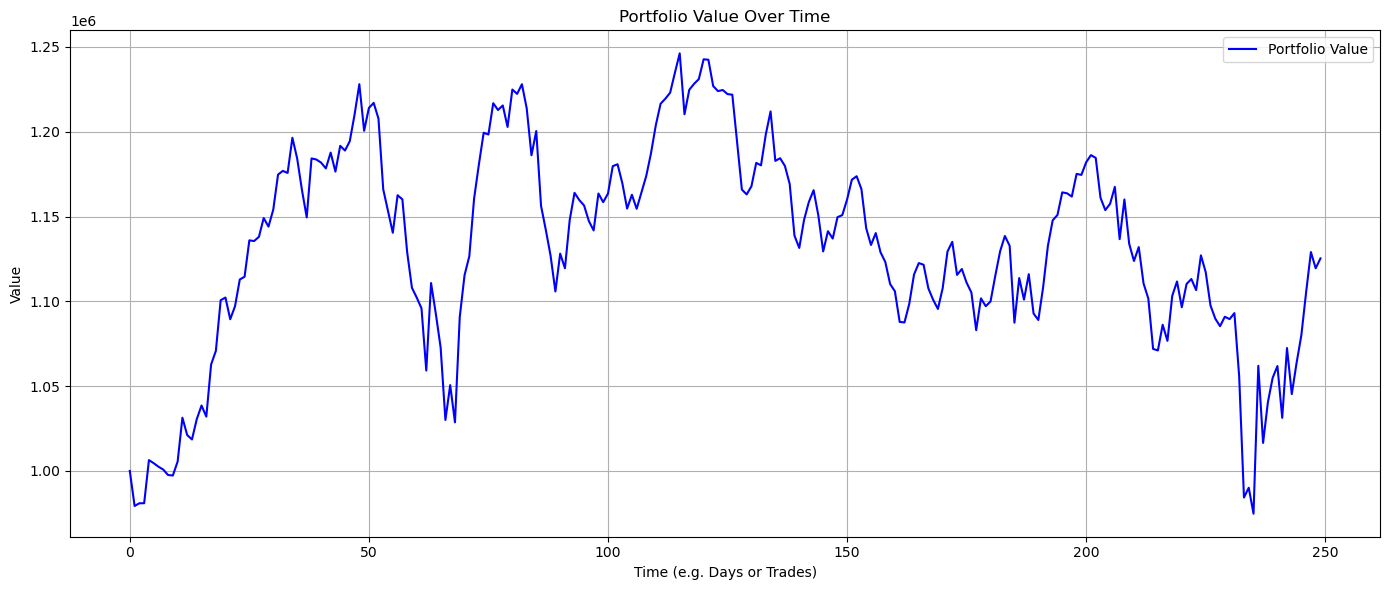

In [41]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(budget_history, label="Portfolio Value", color='blue')
plt.title("Portfolio Value Over Time")
plt.xlabel("Time (e.g. Days or Trades)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Compare results
for name, res in results.items():
    print(f"\nThe result of {name} is as follows\n")
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    '''
    # equal weights
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    '''
    x = X[max_sharpe].T

    print("Best Sharpe: \nReturn     = ", x.T @ mu)
    print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))
    print("sharpo ratio = ", (x.T @ mu - 0.02)/(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0)))


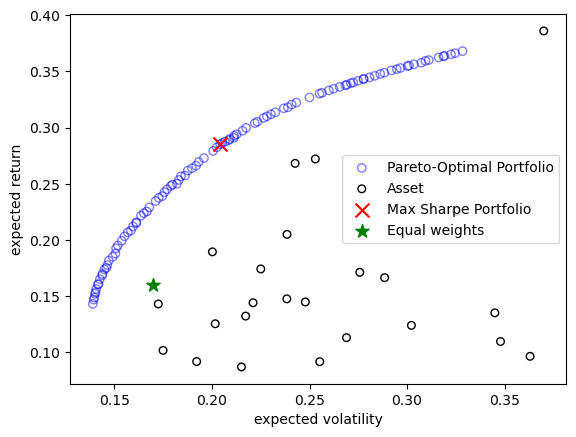

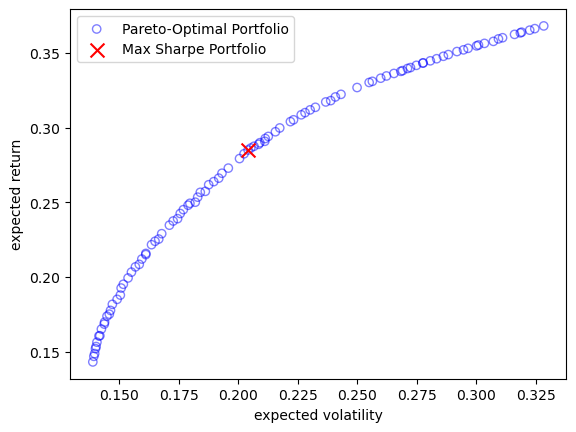

In [52]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [54]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.32297696275160204
META  0.27453075912247143
MSFT  0.1774543857862301
NI    0.10187217354534035
CMCSA 0.06870700223721722
LUV   0.05445871655713892
BAX   0.0
BMY   0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
JPM   0.0
MMC   0.0
MO    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


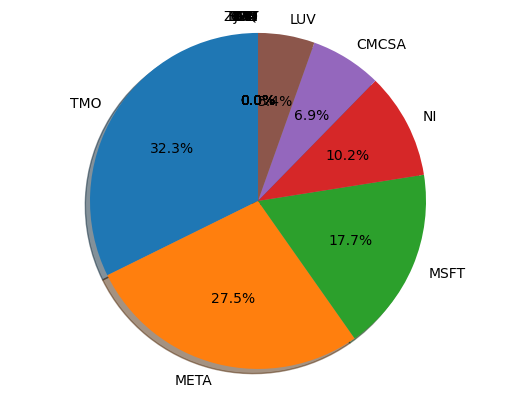

In [56]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [191]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.0933490427723025
Volatility =  0.16460265032746366


In [193]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.019924009576235042
Volatility =  0.48197988245737083


# Solve problem with MOEA/D

In [64]:
import numpy as np
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair

class PortfolioProblem(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(
            n_var=len(mu),
            n_obj=2,
            xl=0.0,
            xu=1.0,
            **kwargs
        )
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk   = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe     = (exp_return - self.risk_free_rate) / exp_risk
        out["F"]   = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

class PortfolioRepair(Repair):
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

# Compute mu, cov from your data
mu  = calculate_expected_returns(current_data)
cov = calculate_covariance_matrix(current_data)

# Problem definition
problem = PortfolioProblem(mu, cov)

# Reference directions for MOEA/D 
ref_dirs = get_reference_directions("uniform", 2, n_partitions=100)

# MOEA/D algorithm setup
algorithm = MOEAD(
    ref_dirs,
    n_neighbors=20,
    prob_neighbor_mating=0.7,
    repair=PortfolioRepair()
)

# Run optimization
res = minimize(problem, algorithm, seed=1, verbose=False)

# Extract and select optimal portfolio
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe_idx = sharpe.argmax()
optimal_weights = X[max_sharpe_idx]

# Hypervolume (optional)
HVindex = calculate_HV(F)


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.022752022831910097


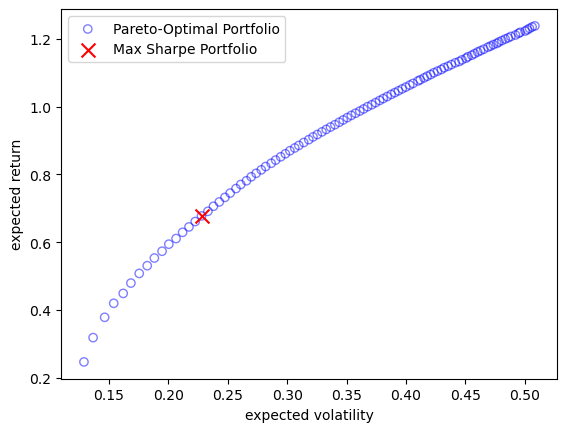

In [65]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

'''
plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()
'''

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()